In [1]:
import numpy as np
import pandas as pd
import math

In [8]:
#data = pd.read_csv("./Cell_line_RMA_proc_basalExp.txt",sep="\t")

gdsc2_label_drugs=pd.read_csv("GDSC2_label_14drugs copy.csv")
gdsc2_label_drugs

,Unnamed: 0,Cisplatin,Crizotinib,Dabrafenib,Docetaxel,Entinostat,Erlotinib,Gefitinib,I-BET-762,Ibrutinib,JQ1,Osimertinib,PLX-4720,Tamoxifen,Trametinib
0,DATA.683665,0.964141,0.995440,0.991812,0.481972,0.737832,0.989480,0.984074,0.815841,0.986655,1.0,0.990236,0.971408,0.964728,0.994088
1,DATA.683667,0.959592,0.952548,0.987206,0.518361,0.751731,0.958145,0.958999,0.966871,0.988762,1.0,0.954614,0.984709,0.912034,0.989145
2,DATA.684052,0.724311,0.988106,0.956075,0.397937,0.883226,0.973575,0.989079,0.937767,0.981702,1.0,0.961193,0.958166,0.949760,0.965742
3,DATA.684057,1.000000,0.971430,1.000000,0.186942,0.790366,1.000000,1.000000,0.985318,0.958920,1.0,1.000000,0.949483,1.000000,1.000000
4,DATA.684059,0.767399,0.991917,0.976539,0.371229,0.852240,0.982904,0.972875,0.987804,0.944549,1.0,0.973288,0.955077,0.930646,0.989165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,DATA.1659928,0.850459,0.831088,0.984334,0.385364,0.822533,0.885207,0.912442,0.855446,0.958144,1.0,0.865413,0.987339,0.962782,0.849947
801,DATA.1660034,0.940000,0.813469,0.965697,0.842921,0.940733,0.937923,0.982930,0.891130,0.956935,1.0,0.924369,0.983832,0.922094,0.737116
802,DATA.1660035,0.982650,0.987296,1.000000,0.861360,0.746285,0.927738,0.972723,0.922922,0.982207,1.0,0.960357,0.980099,0.964134,0.733875
803,DATA.1660036,1.000000,0.983475,0.994046,0.535866,0.975078,1.000000,1.000000,0.992947,0.993288,1.0,1.000000,0.972779,1.000000,0.967038


In [7]:
# Comes from 
#ftp://ftp.sanger.ac.uk/pub/project/cancerrxgene/releases/current_release/GDSC2_fitted_dose_response_25Feb20.xlsx
#label = pd.read_excel("./GDSC2_fitted_dose_response_25Feb20.xlsx")
gdsc2_expression=pd.read_csv("GDSC2_expression14 copy.csv")
gdsc2_expression

,Unnamed: 0,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,LINC00514,OR1D5,ZNF234,MYH4,LINC00526,PPY2,KRT18P55,POLRMTP1,UBL5P2,TBC1D3P5
0,DATA.683665,3.238273,2.982254,10.235491,4.856061,4.078870,9.116236,3.658590,6.145475,5.042464,...,3.103752,3.724013,3.981948,2.823245,5.866047,3.095716,3.274367,3.056214,9.446305,3.530871
1,DATA.683667,7.780713,2.753253,9.960137,4.351073,3.716740,3.222277,8.221606,3.823474,4.756228,...,3.175476,3.779354,4.504481,2.690651,3.347520,3.230713,3.102091,3.169188,9.810430,3.266915
2,DATA.684052,7.301344,2.890533,9.922489,4.125088,3.678987,3.096576,3.588391,4.809305,4.951782,...,3.299300,3.762301,4.177345,2.499803,5.054260,3.003521,3.068187,3.135479,9.073222,3.098364
3,DATA.684057,8.233101,2.824687,10.015884,4.749715,3.839433,3.142754,5.329830,3.272124,5.538055,...,3.081750,3.226083,4.666295,2.491254,6.261573,3.031862,3.322455,2.813440,8.893197,3.266184
4,DATA.684059,8.333466,3.966757,9.793991,3.976923,3.505669,3.079943,3.373640,4.199048,5.794734,...,3.055770,3.738082,4.705392,2.667882,3.885425,2.993918,3.219777,3.033869,8.691401,3.279230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,DATA.1659928,7.245503,2.898369,9.737324,4.295495,3.429522,3.264985,3.509126,6.422919,5.522948,...,3.302293,3.237528,3.770028,2.650564,5.786714,3.189778,3.528351,3.580661,9.717357,3.704140
801,DATA.1660034,8.579664,2.778771,9.768011,5.713156,4.455503,3.388605,3.760805,7.483606,6.906877,...,3.972611,4.007318,3.605398,2.565349,3.260777,2.983984,3.717966,3.719941,9.798886,3.396734
802,DATA.1660035,8.077116,2.781325,10.038055,5.205411,3.758069,3.111444,3.714148,8.947314,6.013510,...,4.991264,3.312884,4.008429,2.772584,5.787669,3.283547,3.740781,3.471996,8.837456,3.143362
803,DATA.1660036,7.797699,2.640900,9.463400,4.039697,3.854522,3.212820,3.369225,8.969264,6.660734,...,6.654799,3.734381,4.158913,2.849266,4.772469,3.101758,3.662190,3.329809,9.491964,3.317055


In [15]:
cell_lines_details = pd.read_excel('Cell_Lines_Details copy.xlsx')
cell_lines_details

C:\Users\mingming.abundo\AppData\Local\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Sample Name,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug\nResponse,GDSC\nTissue descriptor 1,GDSC\nTissue\ndescriptor 2,Cancer Type\n(matching TCGA label),Microsatellite \ninstability Status (MSI),Screen Medium,Growth Properties
0,A253,906794.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
1,BB30-HNC,753531.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
2,BB49-HNC,753532.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
3,BHY,753535.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
4,BICR10,1290724.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,KP-2,1298218.0,Y,N,Y,N,Y,pancreas,pancreas,PAAD,NaN,D/F12,Adherent
998,KO52,1330932.0,Y,Y,N,N,N,leukemia,acute_myeloid_leukaemia,LAML,MSS/MSI-L,D/F12,NaN
999,SC-1,1331030.0,Y,Y,N,N,N,lymphoma,B_cell_lymphoma,DLBC,MSS/MSI-L,R,NaN
1000,U-CH2,1503373.0,Y,Y,N,N,N,bone,bone_other,NaN,MSS/MSI-L,D/F12,Adherent


In [24]:
gdsc2_label_drugs['Unnamed: 0']=gdsc2_label_drugs['Unnamed: 0'].str.replace('DATA.', '')

gdsc2_label_drugs['Unnamed: 0'].dtype

C:\Users\local_mingming.abundo\Temp\ipykernel_15528\2226810541.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  gdsc2_label_drugs['Unnamed: 0']=gdsc2_label_drugs['Unnamed: 0'].str.replace('DATA.', '')


dtype('O')

In [25]:
gdsc2_label_drugs

,Unnamed: 0,Cisplatin,Crizotinib,Dabrafenib,Docetaxel,Entinostat,Erlotinib,Gefitinib,I-BET-762,Ibrutinib,JQ1,Osimertinib,PLX-4720,Tamoxifen,Trametinib
0,683665,0.964141,0.995440,0.991812,0.481972,0.737832,0.989480,0.984074,0.815841,0.986655,1.0,0.990236,0.971408,0.964728,0.994088
1,683667,0.959592,0.952548,0.987206,0.518361,0.751731,0.958145,0.958999,0.966871,0.988762,1.0,0.954614,0.984709,0.912034,0.989145
2,684052,0.724311,0.988106,0.956075,0.397937,0.883226,0.973575,0.989079,0.937767,0.981702,1.0,0.961193,0.958166,0.949760,0.965742
3,684057,1.000000,0.971430,1.000000,0.186942,0.790366,1.000000,1.000000,0.985318,0.958920,1.0,1.000000,0.949483,1.000000,1.000000
4,684059,0.767399,0.991917,0.976539,0.371229,0.852240,0.982904,0.972875,0.987804,0.944549,1.0,0.973288,0.955077,0.930646,0.989165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,1659928,0.850459,0.831088,0.984334,0.385364,0.822533,0.885207,0.912442,0.855446,0.958144,1.0,0.865413,0.987339,0.962782,0.849947
801,1660034,0.940000,0.813469,0.965697,0.842921,0.940733,0.937923,0.982930,0.891130,0.956935,1.0,0.924369,0.983832,0.922094,0.737116
802,1660035,0.982650,0.987296,1.000000,0.861360,0.746285,0.927738,0.972723,0.922922,0.982207,1.0,0.960357,0.980099,0.964134,0.733875
803,1660036,1.000000,0.983475,0.994046,0.535866,0.975078,1.000000,1.000000,0.992947,0.993288,1.0,1.000000,0.972779,1.000000,0.967038


In [34]:
cell_lines_details

,Sample Name,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug\nResponse,GDSC\nTissue descriptor 1,GDSC\nTissue\ndescriptor 2,Cancer Type\n(matching TCGA label),Microsatellite \ninstability Status (MSI),Screen Medium,Growth Properties,Identifier
0,A253,906794.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent,906794
1,BB30-HNC,753531.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent,753531
2,BB49-HNC,753532.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent,753532
3,BHY,753535.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent,753535
4,BICR10,1290724.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent,1290724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,KP-2,1298218.0,Y,N,Y,N,Y,pancreas,pancreas,PAAD,NaN,D/F12,Adherent,1298218
998,KO52,1330932.0,Y,Y,N,N,N,leukemia,acute_myeloid_leukaemia,LAML,MSS/MSI-L,D/F12,NaN,1330932
999,SC-1,1331030.0,Y,Y,N,N,N,lymphoma,B_cell_lymphoma,DLBC,MSS/MSI-L,R,NaN,1331030
1000,U-CH2,1503373.0,Y,Y,N,N,N,bone,bone_other,NaN,MSS/MSI-L,D/F12,Adherent,1503373


In [30]:
cell_lines_details['Identifier'] = cell_lines_details['COSMIC identifier'].astype(str)
cell_lines_details['Identifier'] = cell_lines_details['Identifier'].str.replace('\.0$', '', regex=True)

In [38]:
merged_data = pd.merge(cell_lines_details, gdsc2_label_drugs, left_on='Identifier', right_on='Unnamed: 0', how='inner')

In [42]:
merged_data.head()

,Sample Name,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug\nResponse,GDSC\nTissue descriptor 1,GDSC\nTissue\ndescriptor 2,Cancer Type\n(matching TCGA label),...,Entinostat,Erlotinib,Gefitinib,I-BET-762,Ibrutinib,JQ1,Osimertinib,PLX-4720,Tamoxifen,Trametinib
0,A253,906794.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,...,0.952223,0.973817,0.962793,0.976636,0.962518,1.0,0.977498,0.985845,0.967958,0.959106
1,BB49-HNC,753532.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,...,0.899209,0.972964,0.938016,0.884688,0.970127,1.0,0.939255,0.899614,0.900795,0.662376
2,BICR10,1290724.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,...,0.931525,0.961246,0.972174,0.883308,0.960696,1.0,0.970665,0.939036,0.926969,0.940581
3,BICR22,1240121.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,...,0.884834,0.981971,0.968008,0.944629,0.985561,1.0,0.966253,0.972216,0.950807,0.926846
4,BICR78,1240122.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,...,0.850470,0.898218,0.922445,0.922720,0.971625,1.0,0.909912,0.965008,0.905961,0.862620


In [ ]:
drug_response_cols = ['Cisplatin', 'Crizotinib', 'Dabrafenib', 'Docetaxel', 'Entinostat', 'Erlotinib', 'Gefitinib', 'I-BET-762', 'Ibrutinib', 'JQ1', 'Osimertinib', 'PLX-4720', 'Tamoxifen', 'Trametinib']
drug_response_data = merged_data[drug_response_cols]

C:\Users\local_mingming.abundo\Temp\ipykernel_15528\2187975462.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


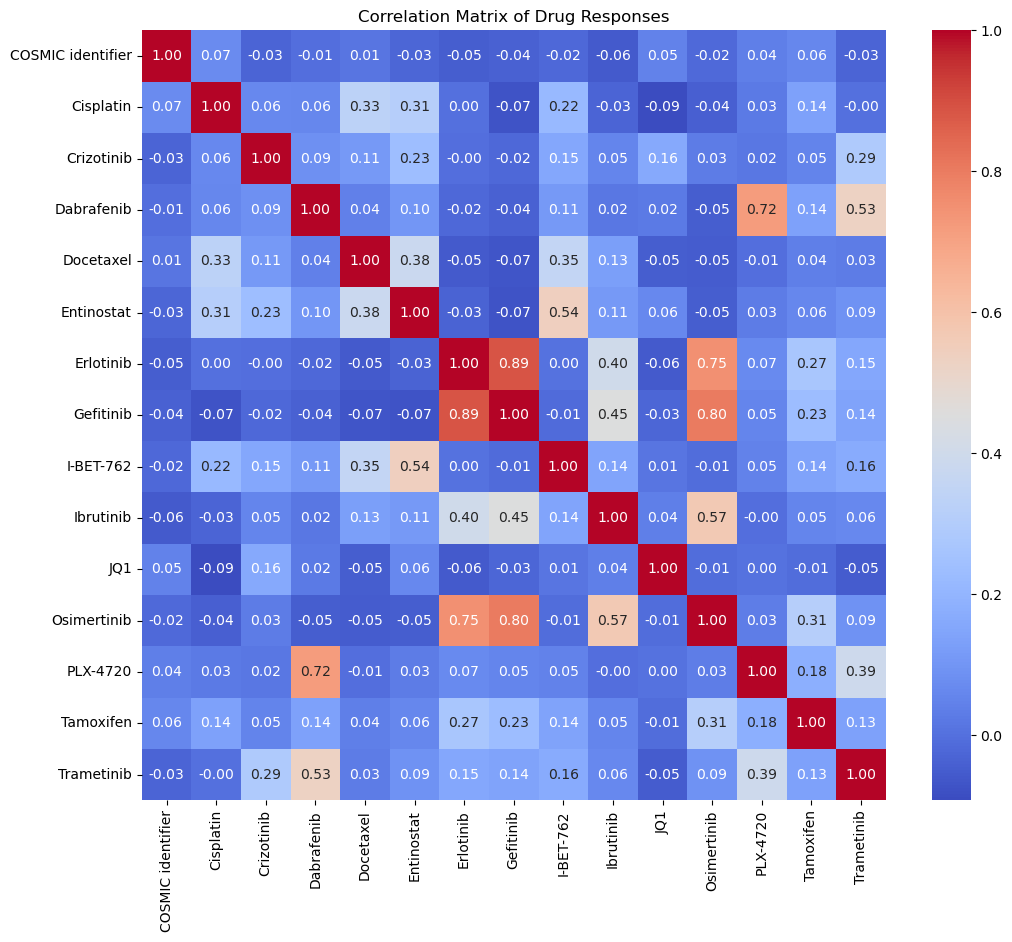

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = merged_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Drug Responses')
plt.show()

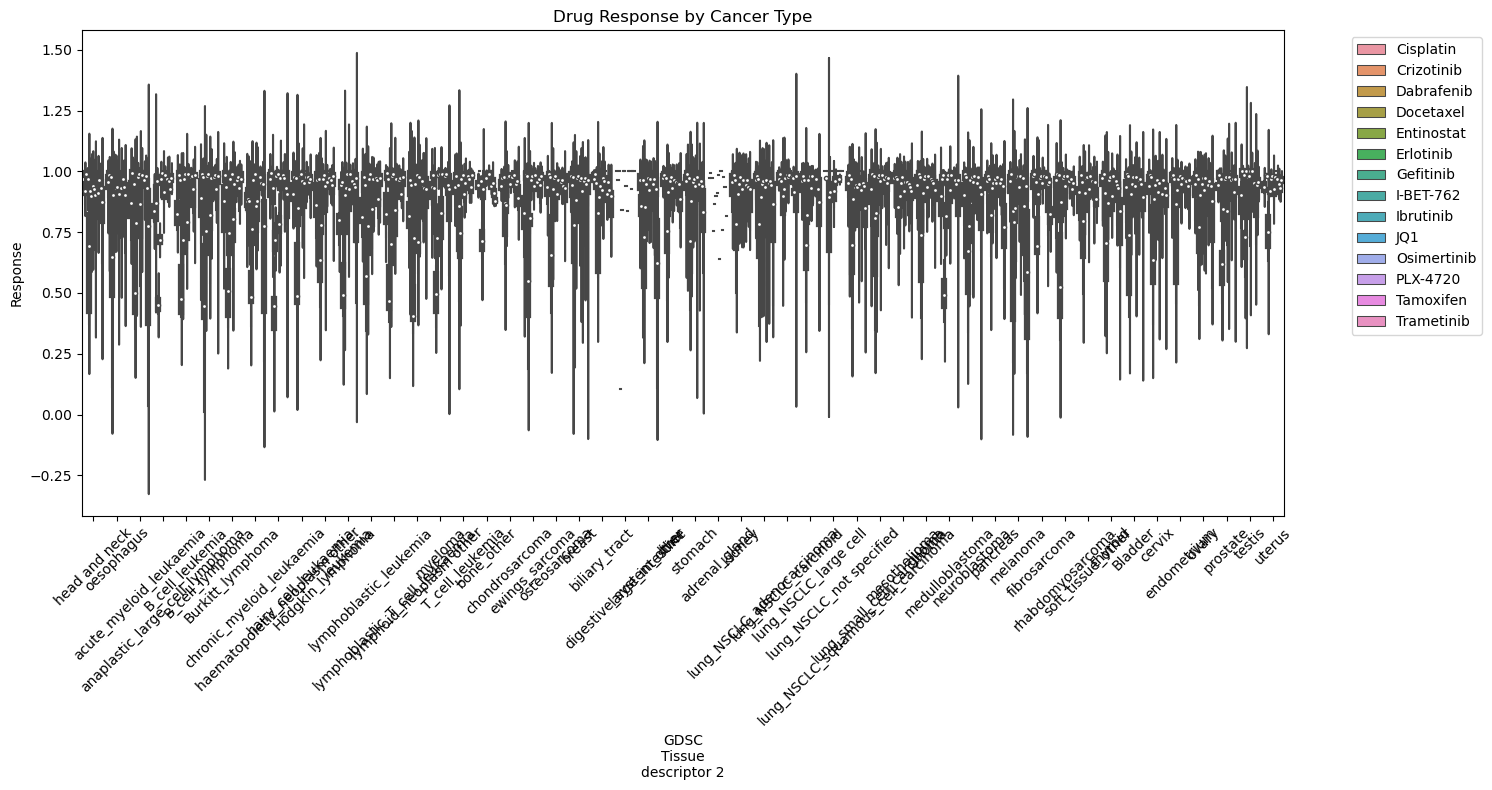

In [56]:
long_form_df = merged_data.melt(id_vars='Cancer Type\n(matching TCGA label)',
                                value_vars=drug_response_cols,
                                var_name='Drug',
                                value_name='Response')

plt.figure(figsize=(15, 8))  # Adjust the size of the plot as needed
sns.violinplot(x='Cancer Type\n(matching TCGA label)', y='Response', hue='Drug', data=long_form_df)
plt.xticks(rotation=45)
plt.title('Drug Response by Cancer Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)  # Move the legend out of the plot
plt.tight_layout()  # Adjust layout to fit legend and axis labels
plt.show()

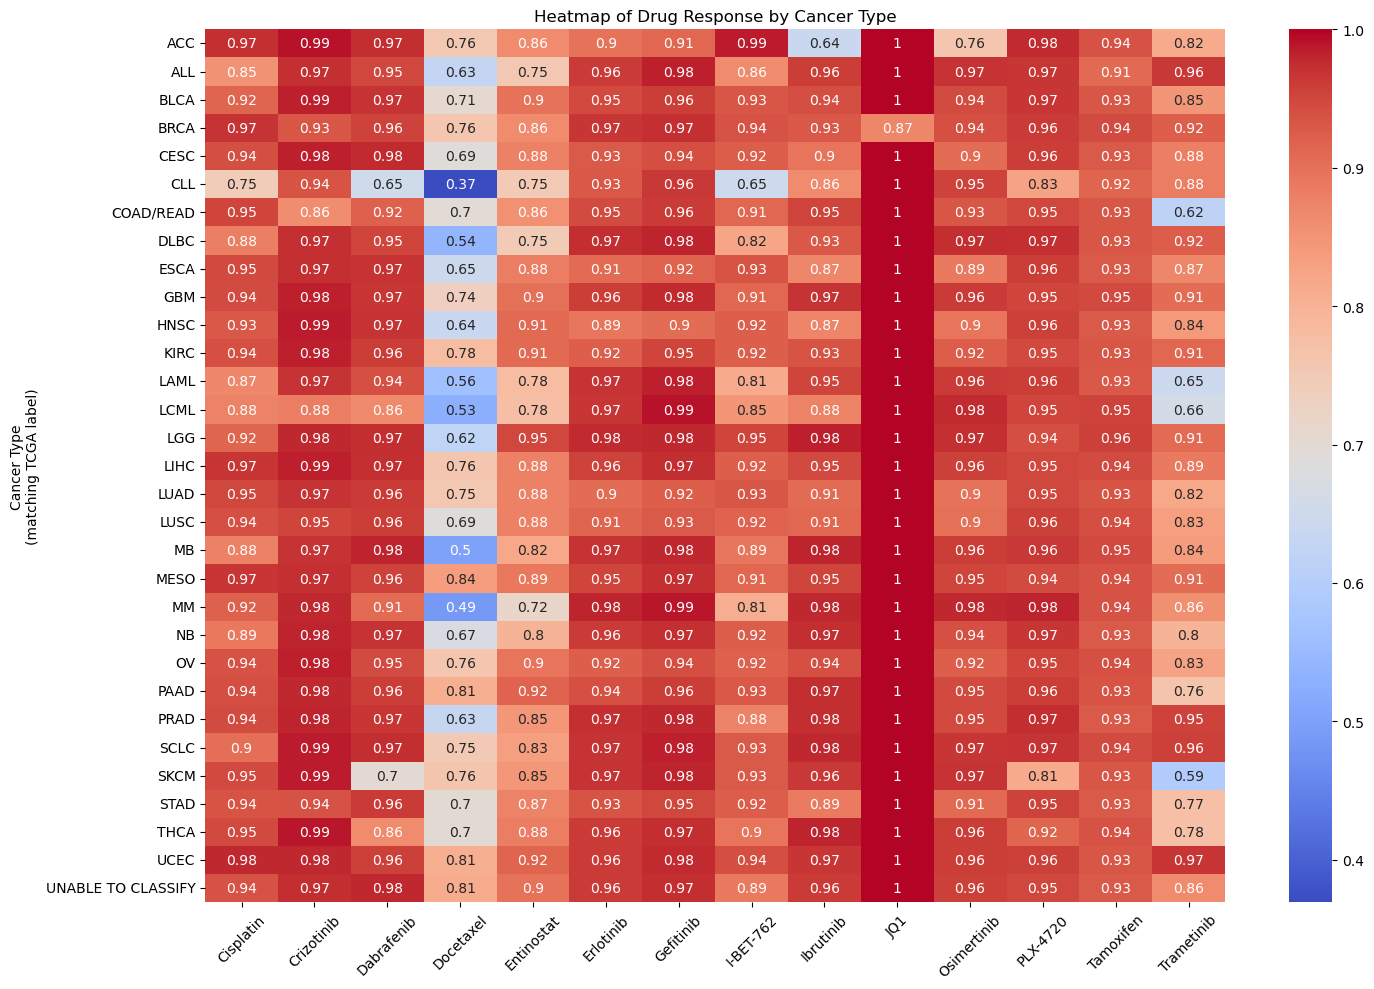

In [61]:
drug_response_data = merged_data[['Cancer Type\n(matching TCGA label)'] + drug_response_cols]

# Pivot the data to get Cancer Types as rows and Drug Responses as columns
# and compute the mean response for each drug and cancer type
pivot_table = drug_response_data.pivot_table(
    index='Cancer Type\n(matching TCGA label)', 
    values=drug_response_cols, 
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True)
plt.title('Heatmap of Drug Response by Cancer Type')
plt.xticks(rotation=45)  # Rotates the cancer type labels for better readability
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()

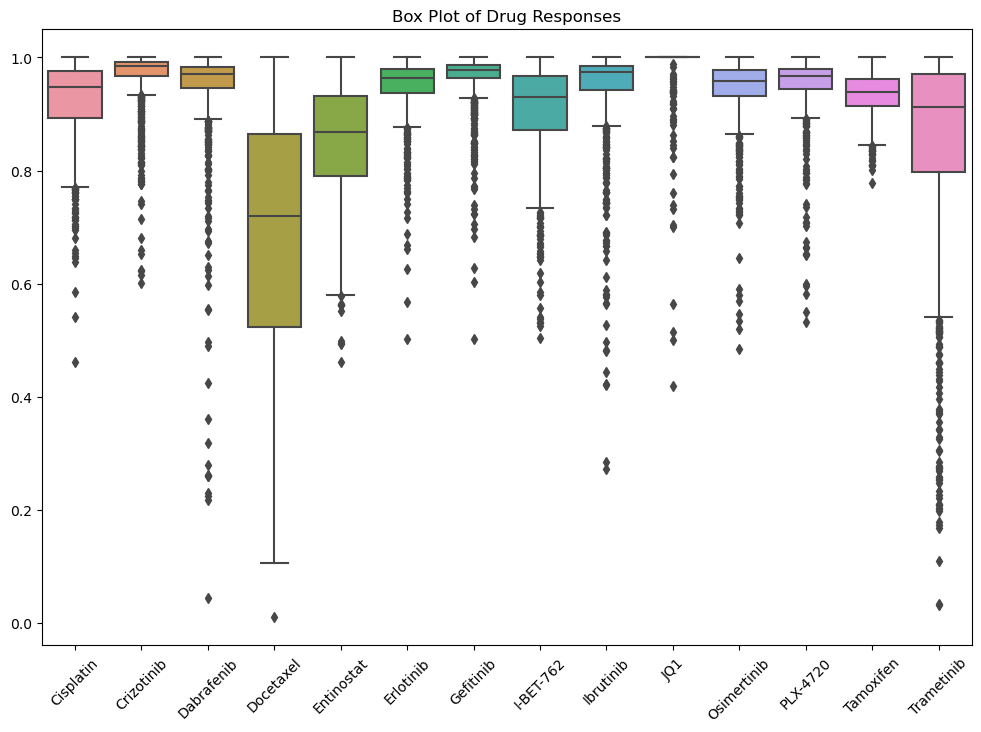

In [46]:
# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=drug_response_data)
plt.title('Box Plot of Drug Responses')
plt.xticks(rotation=45)  
plt.show()

In [62]:
drug_response_data

,Cancer Type\n(matching TCGA label),Cisplatin,Crizotinib,Dabrafenib,Docetaxel,Entinostat,Erlotinib,Gefitinib,I-BET-762,Ibrutinib,JQ1,Osimertinib,PLX-4720,Tamoxifen,Trametinib
0,NaN,0.912758,0.996061,0.989185,0.894440,0.952223,0.973817,0.962793,0.976636,0.962518,1.000000,0.977498,0.985845,0.967958,0.959106
1,HNSC,0.916200,0.977206,0.961117,0.400672,0.899209,0.972964,0.938016,0.884688,0.970127,1.000000,0.939255,0.899614,0.900795,0.662376
2,HNSC,0.977797,0.988608,0.978262,0.535735,0.931525,0.961246,0.972174,0.883308,0.960696,1.000000,0.970665,0.939036,0.926969,0.940581
3,HNSC,0.924667,0.993556,0.980859,0.372455,0.884834,0.981971,0.968008,0.944629,0.985561,1.000000,0.966253,0.972216,0.950807,0.926846
4,HNSC,0.945984,0.988010,0.961862,0.856118,0.850470,0.898218,0.922445,0.922720,0.971625,1.000000,0.909912,0.965008,0.905961,0.862620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,HNSC,0.980559,0.967943,0.970530,0.819333,0.970641,0.823303,0.862116,0.927108,0.444413,1.000000,0.892653,0.979834,0.957431,0.797026
801,BRCA,0.987213,0.943441,0.989965,0.485320,0.936357,0.976128,0.988290,0.978621,0.974059,0.942634,0.983554,0.983119,0.934609,0.915146
802,COAD/READ,1.000000,0.815713,0.424515,0.449928,0.791332,1.000000,1.000000,0.861938,0.956776,1.000000,1.000000,0.931751,1.000000,0.109443
803,LUAD,0.987473,0.969685,0.982937,0.837372,0.798093,0.984315,0.978242,0.983671,0.985718,1.000000,0.970267,0.970743,0.968001,0.981422
